<a href="https://colab.research.google.com/github/marciocardoso123/DATASCIENCE-/blob/main/Reconhecimento_de_img_com_DigitsDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reconhecimento de imagens com sklearn 



In [23]:
from sklearn import datasets
digits = datasets.load_digits()

In [24]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [25]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


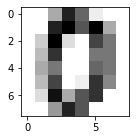

In [26]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline

plt.figure(figsize=(2,2))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)


#Support Vector Machine
Algoritmo supervisionadopara criar limites entre grupos de dados

In [27]:
#Vamos dividir os dados em treino e teste
from sklearn.model_selection import train_test_split
x = digits.data
y = digits.target
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=5)

In [31]:
from sklearn import svm
from sklearn import metrics
classifier = svm.SVC()
classifier.fit(x_train, y_train)
previsoes = classifier.predict(x_test)
acertos = metrics.accuracy_score(y_test,previsoes)
print(acertos)



0.9851851851851852


#Leitura de imagem de um dígito

In [40]:
from pandas.core.dtypes.common import is_numeric_v_string_like
import numpy as np
import matplotlib.image as mpimg

img = mpimg.imread('/content/number.png')


#convertendo rgb para formato compativel
def rgb2gray(rgb):
  img_array = np.dot(rgb[...,:3], [0.299,0.587,0.114])
  img_array = (16-(img_array * 16)).astype(int)
  img_array = img_array.flatten()
  return img_array

previsoes = classifier.predict([rgb2gray(img)])
print(previsoes)

[1]
